# 191213071 Mustafa Kürşat KESKİN uyg. veri bilimi Ödevi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Pandas numpy ve seaborn kütüphanesini Projeye Dahil Ediyoruz.

In [2]:
excel_data = pd.read_excel('data.xlsx')

excel_data adında değişken tanımlayarak read_excel fonksiyonu ile "data.xlsx" adındaki veriyi okuyoruz.

In [3]:
data = pd.DataFrame(excel_data, columns=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])

veri kümesini keşfedelim ve neler içerdiğini analiz edelim.

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


veri kümemizi görüntülemek için ekrana yazdırıyoruz.

In [5]:
len(data.columns)

8

veri kümemizdeli column sayısını öğreniyoruz.

In [6]:
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


veri kümemizdeki columnların isimlerini öğreniyoruz.

In [7]:
print(data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


veri kümesindeki columnların veri tiplerini indexlerini, mb türünden büyüklüğünü ve hangi veri türünden kaç adet olduğunu öğreniyoruz.

In [9]:
data.shape

(541909, 8)

veri kümesindeki satır ve sutun sayıları.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [11]:
unitprice=data['UnitPrice'].unique()
unitprice.size

1630

unique fonksiyonunu kullanarak kaç adet benzersiz değer olduğunu bulduk.

In [12]:
unitprice

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

bazı unit price değerleri

In [13]:
customers=data['CustomerID'].unique()
customers.size

4373

In [14]:
customers

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [15]:
country=data['Country'].value_counts() 

veri setimizde hangi ülkeden kaç adet kayıt olduğunu bulduk.

In [16]:
country

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [17]:
import matplotlib.pyplot as plt 

matplotlib kütüphanesini import ederek verilerimizi görselleştirerek analiz yapacağız.

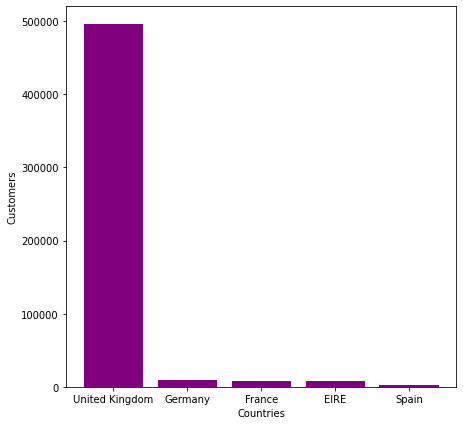

In [18]:
firstfive_index = country[:5].index
firstfive_values = country[:5]
plt.figure(figsize=(7,7))
plt.bar(firstfive_index,firstfive_values,color='purple')
plt.ylabel('Customers')
plt.xlabel('Countries')
plt.show()

In [19]:
stock_code=data.groupby('Country')['UnitPrice'].sum().sort_values(ascending =False)
sal_10=stock_code[:10]
sal_10

Country
United Kingdom    2245715.474
EIRE                48447.190
France              43031.990
Germany             37666.000
Singapore           25108.890
Portugal            13037.540
Spain               12633.450
Hong Kong           12241.500
Belgium              7540.130
Switzerland          6813.690
Name: UnitPrice, dtype: float64

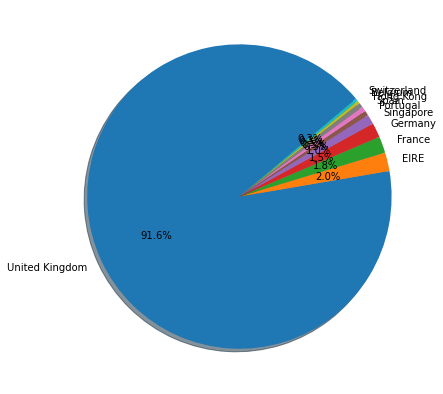

In [20]:
plt.figure(figsize=(7,7))
plt.pie(sal_10,startangle=40,autopct='%1.1f%%',shadow=True,labels=sal_10.index)
plt.show()

In [21]:
stock_code=data.groupby('Quantity')['UnitPrice'].sum().sort_values(ascending =False)
sal_10=stock_code[:10]
sal_10

Quantity
 1     983386.674
-1     427536.990
 2     354432.570
 4     142542.130
 3     128854.550
 6     114259.830
 12     95301.900
 10     43679.920
 8      35613.130
 5      29954.150
Name: UnitPrice, dtype: float64

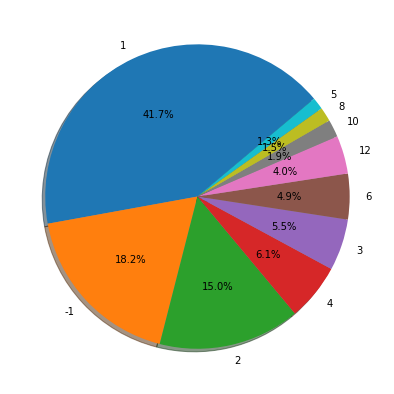

In [22]:
plt.figure(figsize=(7,7))
plt.pie(sal_10,startangle=40,autopct='%1.1f%%',shadow=True,labels=sal_10.index)
plt.show()

In [23]:
data.UnitPrice.value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64

In [24]:
data[data.UnitPrice==float(1.65)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom
39,536370,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-01 08:45:00,1.65,12583.0,France
93,536378,20725,LUNCH BAG RED RETROSPOT,10,2010-12-01 09:37:00,1.65,14688.0,United Kingdom
116,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom
137,536381,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2010-12-01 09:41:00,1.65,15311.0,United Kingdom
...,...,...,...,...,...,...,...,...
541805,581578,22736,RIBBON REEL MAKING SNOWMEN,10,2011-12-09 12:16:00,1.65,12713.0,Germany
541839,581580,22906,12 MESSAGE CARDS WITH ENVELOPES,1,2011-12-09 12:20:00,1.65,12748.0,United Kingdom
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France


unit price değerleri 1.65 olan kayıtları görüntüledik.

In [25]:
data[data.Country=="Germany"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany


Almanya ya ait değerleri gösterdik.

In [26]:
data[data.Country=="France"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
Group = data.groupby(['Country','Description'])['UnitPrice'].sum().sort_values(ascending =False)


Country ve Description alanlarını gruplayarak bu iki alanın karşılığında unitprice değerlerinin gösterilmesi sağlandı.

In [28]:
Group

Country         Description                 
United Kingdom  AMAZON FEE                      249042.68
                DOTCOM POSTAGE                  206252.06
                Manual                          129871.21
                REGENCY CAKESTAND 3 TIER         26182.21
Singapore       Manual                           24317.80
                                                  ...    
United Kingdom  lost??                               0.00
                Found by jackie                      0.00
                wrongly sold (22719) barcode         0.00
                lost in space                        0.00
                Adjust bad debt                 -11062.06
Name: UnitPrice, Length: 20176, dtype: float64

In [29]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

veri setimizde eksik veri bulunan kayıt sayılarının tespitini yaptık.

In [30]:
data.notnull().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Veri Setimizdeki Toplam null olmayan kayıt sayılarının tespitini yaptık.

In [31]:
data.isnull().sum() / data.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

eksik verilerin yüzdelik oranlarını bulduk.

In [32]:
data["Description"].fillna(data["Description"].mode()[0])

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [33]:
data["Description"].mode()[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

eksik verilerin tamamlanması

In [34]:
data.dropna(subset = ['Description'], inplace = True)

veri setinde description alanındaki eksik verileri siliyoruz.

In [35]:
data.shape

(540455, 8)

silme işleminden sonra veri setindeki kayıt sayımıza bakıyoruz.

In [36]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

eksik veri sorgulamasını tekrar yapıyoruz.

In [37]:
data.dropna(subset = ['CustomerID'], inplace = True)

veri setindeki customerId alanı boş olan kayıtları siliyoruz

In [38]:
data.shape

(406829, 8)

veri setinindeki kayıt sayılarını kontrol ediyoruz

In [39]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [40]:
france_data = data.query("Country == 'France'")

veri kümemizden Fransaya dair verileri çekiyoruz ve france_data adındaki değişkende birleştiriyoruz.

In [41]:
france_data.shape

(8491, 8)

fransaya ait verinin boyutunu öğreniyoruz.

In [42]:
france_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [43]:
france_data['Description'].head()

26          ALARM CLOCK BAKELIKE PINK
27          ALARM CLOCK BAKELIKE RED 
28         ALARM CLOCK BAKELIKE GREEN
29    PANDA AND BUNNIES STICKER SHEET
30                   STARS GIFT TAPE 
Name: Description, dtype: object

In [44]:
france_data['Description'] = france_data['Description'].str.strip()

C:\Users\bunya\AppData\Local\Temp\ipykernel_2928\2663477329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data['Description'] = france_data['Description'].str.strip()


In [45]:
france_data['InvoiceNo'].str.contains('C').sum()

149

In [46]:
france_data['InvoiceNo'] = france_data['InvoiceNo'].astype('str')

C:\Users\bunya\AppData\Local\Temp\ipykernel_2928\586240202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data['InvoiceNo'] = france_data['InvoiceNo'].astype('str')


In [47]:
france_data = france_data[~france_data['InvoiceNo'].str.contains('C')]

In [48]:
france_data.shape

(8342, 8)

In [49]:
data3 = france_data.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack()

In [50]:
data3.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data3.notnull().sum()

Description
10 COLOUR SPACEBOY PEN             12
12 COLOURED PARTY BALLOONS          6
12 EGG HOUSE PAINTED WOOD           1
12 MESSAGE CARDS WITH ENVELOPES     2
12 PENCIL SMALL TUBE WOODLAND       6
                                   ..
ZINC FOLKART SLEIGH BELLS           7
ZINC HERB GARDEN CONTAINER          1
ZINC METAL HEART DECORATION         2
ZINC T-LIGHT HOLDER STAR LARGE      1
ZINC T-LIGHT HOLDER STARS SMALL     2
Length: 1543, dtype: int64

In [52]:
data3 = data3.fillna(0)

In [53]:
data3.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
def convert_values(value):
    if value >= 1:
        return 1
    else:
        return 0 

In [55]:
data3 = data3.applymap(convert_values)

In [56]:
data3 = data3.drop('POSTAGE', axis = 1)

In [57]:
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules

In [58]:
data3_items = apriori(data3, min_support = 0.01, use_colnames = True)

c:\Users\bunya\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [59]:
rules = association_rules(data3_items, metric = 'lift')

In [60]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CARD DOLLY GIRL),(10 COLOUR SPACEBOY PEN),0.030848,0.030848,0.010283,0.333333,10.805556,0.009331,1.453728
1,(10 COLOUR SPACEBOY PEN),(CARD DOLLY GIRL),0.030848,0.030848,0.010283,0.333333,10.805556,0.009331,1.453728
2,(CHARLOTTE BAG SUKI DESIGN),(10 COLOUR SPACEBOY PEN),0.043702,0.030848,0.010283,0.235294,7.627451,0.008935,1.267352
3,(10 COLOUR SPACEBOY PEN),(CHARLOTTE BAG SUKI DESIGN),0.030848,0.043702,0.010283,0.333333,7.627451,0.008935,1.434447
4,(ICE CREAM SUNDAE LIP GLOSS),(10 COLOUR SPACEBOY PEN),0.046272,0.030848,0.010283,0.222222,7.203704,0.008855,1.246052
...,...,...,...,...,...,...,...,...,...
1140111,(CHILDRENS CUTLERY DOLLY GIRL),"(LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE...",0.071979,0.010283,0.010283,0.142857,13.892857,0.009543,1.154670
1140112,(JUMBO BAG APPLES),"(LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE...",0.066838,0.010283,0.010283,0.153846,14.961538,0.009595,1.169666
1140113,(ALARM CLOCK BAKELIKE GREEN),"(LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE...",0.097686,0.010283,0.010283,0.105263,10.236842,0.009278,1.106155
1140114,(LUNCH BOX WITH CUTLERY RETROSPOT),"(LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE...",0.143959,0.010283,0.010283,0.071429,6.946429,0.008802,1.065849
